## Example LabelEncoder Titanic

In [40]:
#TODO
# LabelEncoder
# Scaler

## TP digit recognizer 

https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
train = pd.read_csv('./mnist/train.csv')
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
target = train['label']
train = train.drop("label",axis=1)

## Display images

In [39]:
import cv2
import numpy as np


img1 = train.iloc[3].to_numpy()
img1 = img1.reshape((28,28)).astype(np.uint8)
cv2.imshow("img", img1)
img1.shape

cv2.waitKey(0)
  
#closing all open windows  
cv2.destroyAllWindows()

## Using PCA and plotting

In [32]:
from sklearn.preprocessing import StandardScaler

n_components = 5

X = train.values
# X = StandardScaler().fit_transform(train.values)
pca = PCA(n_components=n_components).fit(X)

eigenvalues = pca.components_

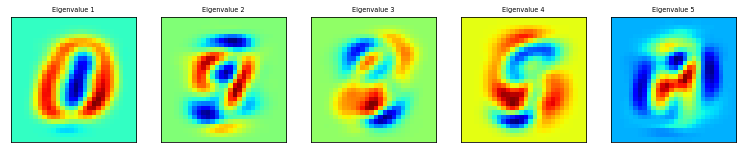

In [24]:
n_row = 1
n_col = n_components

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [25]:
X_5d = pca.transform(X[:1000])

trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
#     name = Target,
#     hoveron = Target,
    mode = 'markers',
    text = target[:1000],
    showlegend = False,
    marker = dict(
        size = 8,
        color = target[:1000],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

## Using LDA

In [30]:
from sklearn.preprocessing import StandardScaler

n_components = 5

# X = train.values
X = StandardScaler().fit_transform(train.values)
lda = LDA(n_components=n_components).fit(X, target)

C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning:

Variables are collinear.



In [31]:
lda.means_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

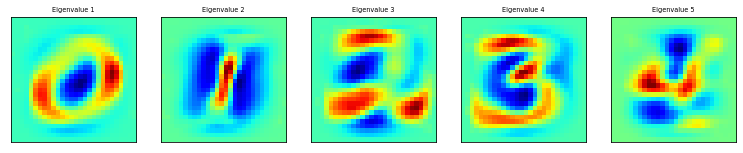

In [33]:
n_row = 1
n_col = n_components

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(lda.means_[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [34]:
X = lda.transform(train[:1000])

traceLDA = go.Scatter(
    x = X[:,0],
    y = X[:,1],
#     name = Target,
#     hoveron = Target,
    mode = 'markers',
    text = target[:1000],
    showlegend = True,
    marker = dict(
        size = 8,
        color = target[:1000],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

## Suite pour demain matin

In [35]:
from sklearn.svm import SVC

cls = SVC()

cls.fit(X[:500], target[:500])

score = cls.score(X[500:800], target[500:800])

score

C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.11

In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X[:500], target[:500])

y_pred = xgb_model.predict(X[500:800])

print(confusion_matrix(target[500:800], y_pred))
print(accuracy_score(target[500:800], y_pred))

[[28  0  0  0  0  3  0  0  0  0]
 [ 0 32  1  0  0  0  0  0  1  0]
 [ 0  0 32  0  0  0  0  1  0  0]
 [ 0  1  0 18  0  1  0  1  7  0]
 [ 0  0  0  0 19  0  3  0  1  3]
 [ 0  0  0  3  0 24  0  0  8  0]
 [ 0  0  0  0  0  0 28  0  1  0]
 [ 0  1  1  0  1  0  0 21  0  4]
 [ 0  2  2  1  0  4  0  0 21  0]
 [ 0  0  1  0  2  1  0  5  0 17]]
0.8


## Image processing

We know how to find the right label but if we look at the input image it's not directly drawings.
We need to process images to get a clean input.
It's like feature enginering for images.

In [51]:
import cv2
import numpy as np

img = cv2.imread("numero.jpg")

# img = cv2.resize(img, None, fx=0.2, fy=0.2) # resize pour voir en entier
# img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # on le met dans le bon sens
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# _, img = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY) # tatonner avec le threshold

In [18]:
cv2.imshow("img", img)

cv2.waitKey(0)

#closing all open windows  
cv2.destroyAllWindows()

#### On voit que le treshold ne rend pas tous les chiffres nets à cause de la lumière (problème courant...)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [52]:
img = cv2.imread("numero.jpg")

img = cv2.resize(img, None, fx=0.2, fy=0.2) # resize pour voir en entier
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # on le met dans le bon sens
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.medianBlur(img,15)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,31,2) # inverser pour mettre en blanc

cv2.imshow("img", img)

cv2.waitKey(0)
  
#closing all open windows  
cv2.destroyAllWindows()

### Maintenant il faut segmenter les différents numéros

In [50]:
seg = cv2.pyrDown(img)

kernel = np.ones((15,15),np.uint8)
seg = cv2.morphologyEx(seg, cv2.MORPH_CLOSE, kernel)

cv2.imshow("img", seg)

print(seg.shape)

cv2.waitKey(0)
  
#closing all open windows  
cv2.destroyAllWindows()

(300, 400)


In [53]:
seg = cv2.pyrDown(img)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
seg = cv2.dilate(seg, kernel, iterations=4)

cv2.imshow("img", seg)

print(seg.shape)

cv2.waitKey(0)
  
#closing all open windows  
cv2.destroyAllWindows()


(300, 400)


In [57]:
gray = cv2.pyrDown(img)

cv2.imshow("img", gray)

cv2.waitKey(0)
  
#closing all open windows  
cv2.destroyAllWindows()


In [59]:
gray = cv2.pyrDown(img)
# gray = gray[20:-20,20:-20]
# seg = seg[20:-20,20:-20]

contours, hier = cv2.findContours(seg,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))
print(hier)

for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(gray,(x,y),(x+w,y+h),255,2)

cv2.imshow('IMG',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

13
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [-1 11 -1 -1]]]


[<KeyPoint 0000024D86C52780>]